# <strong> Author : JAGRUTI RAJPUT</strong>

## GRIP : The Sparks Foundation  (#GRIP JANUARY23)

## Data Science and Business Analytics Intern

# Task 1 : Prediction using Supervised Machine Learning 

## Problem Statement
**Aim:-** Predict the percentage of an student based on the number of study hours. This is a simple linear regression task as it involves just 2 variables.

**Question:-** What will be predicted score if a student studies for 9.25hr/day.

In [1]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline


### Dataset used : http://bit.ly/w-data

In [2]:
# Read the csv dataset as a pandas dataframe
path = 'http://bit.ly/w-data'
data = pd.read_csv(path)

print('Data is imported successfully')

Data is imported successfully


In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head()  #displays top 5 rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()   #displays last 5 rows of data

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.shape   #displays shape of data

(25, 2)

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe().T   #displays Statistical information of dataset

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### Checking for missing values (remove if found)

In [9]:
p=data.isnull().sum()#Displays sum total of null values present in dataset
print(p)
print()
q=data.nunique()        #Displays all number of unique values in dataset
print(q)

Hours     0
Scores    0
dtype: int64

Hours     23
Scores    23
dtype: int64


In [10]:
#Check if the duplicate values are present in the dataset.
data[data.duplicated()]      # No duplicate value present in the dataset.

,Hours,Scores


In [11]:
# Check if there is any null value present in our Dataset
data.isnull == True

False

#### ===> By above results it concludes that, their is no null/missing values or duplicates present in the dataset.    Now visualize the dataset

## Data Visualization

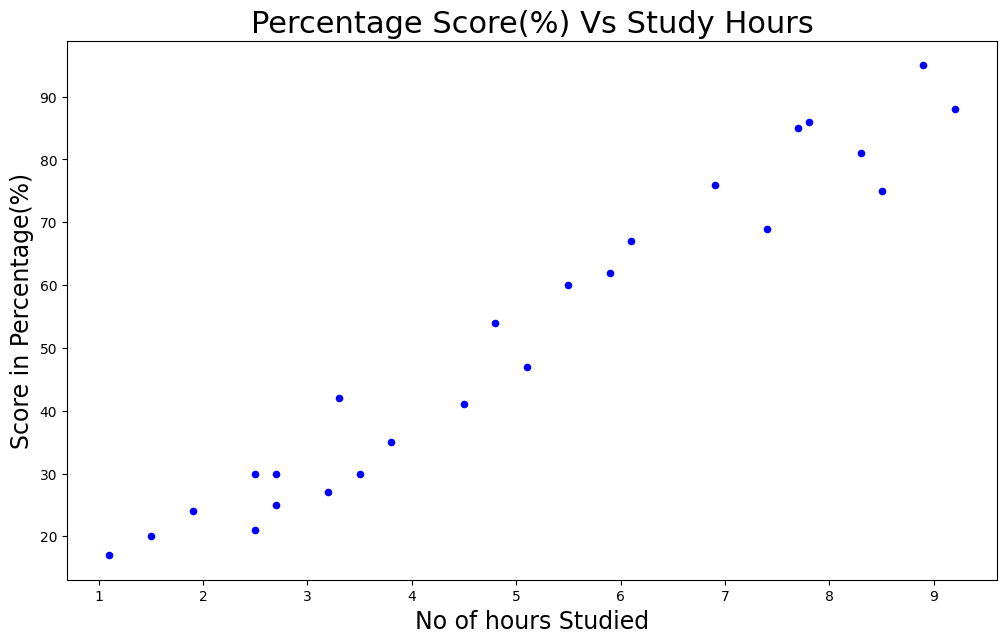

In [12]:
#plotting scatter plot to check relationship
data.plot(kind='scatter',x='Hours',y='Scores',color='b',figsize=(12,7))
plt.title('Percentage Score(%) Vs Study Hours',size=22)
plt.ylabel('Score in Percentage(%)', size=17)
plt.xlabel('No of hours Studied', size=17)
plt.show()

##### ===> From above graph clearly see that there is a positive linear relation between the number of hours studied and percentage of score.*

<AxesSubplot: >

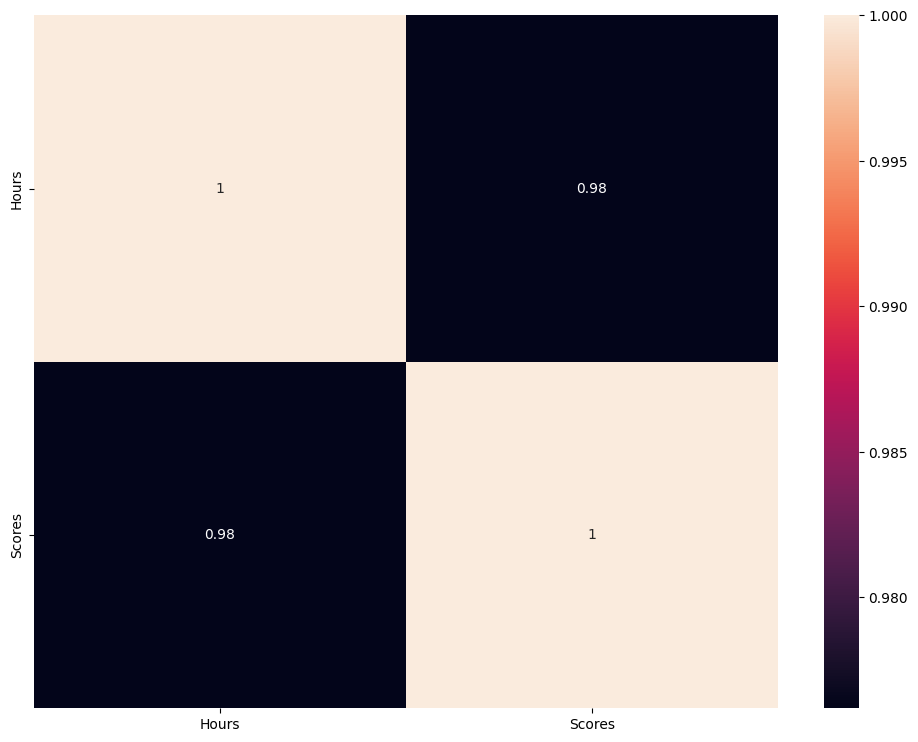

In [13]:
#Plotting heatmap to find any coorelation 
correlation=data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(correlation,annot=True) 

#### ===> It is clear that variable is highly dependent on one another.

## Preparing the data

### Divide the data into inputs & outputs

In [14]:
X = data.iloc[:, :-1].values   #This slicing will show all rows & 0th column only(Hours).  (independent)
y = data.iloc[:, 1].values     #This slicing will show all rows & 1st column only(Scores). (dependent)

In [15]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Dividing data into training and testing data

In [17]:
#Split the data into train and test data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


### Training the Model

In [18]:
#Building simple linear regression model

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

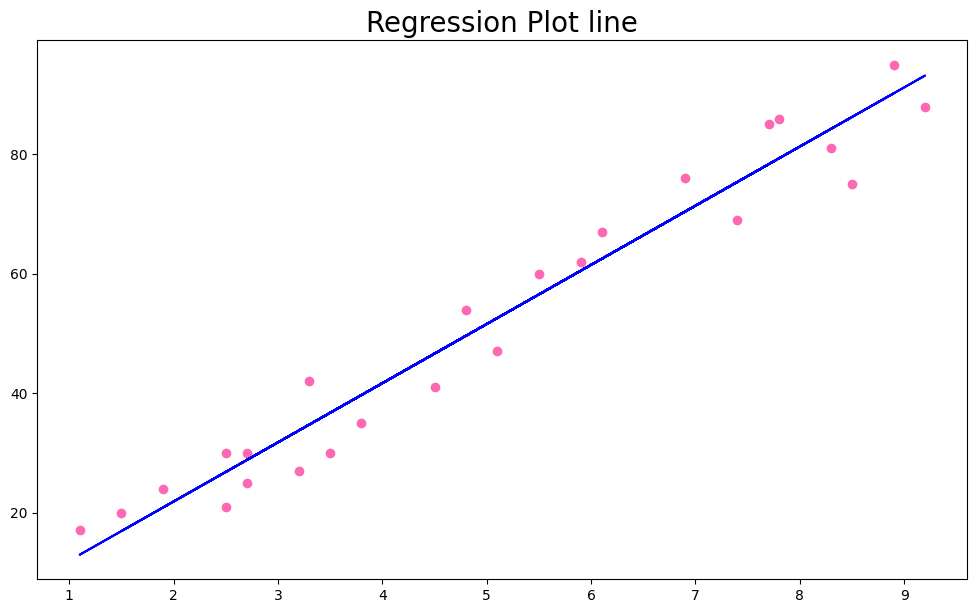


           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [19]:
#Plotting graph of the regression line (fitting the model)
 
line = regressor.coef_*X+regressor.intercept_

#plotting for the test data
plt.figure(figsize=(12,7))
plt.scatter(X, y, color = 'hotpink')
plt.plot(X, line,"-b")
plt.title("Regression Plot line",size=20)

plt.show()

print()
print(data.corr())

In [20]:
#Estimating training and test score

print(f'Test Score: {regressor.score(X_test, y_test)}')
print()
print(f'Training Score: {regressor.score(X_train, y_train)}')

Test Score: 0.9454906892105355

Training Score: 0.9515510725211552


## Making Predictions of Percentage of Scores(%) using test data


Now that we have trained our algorithm, it's time to make some predictions.

In [21]:
# Testing data - (In Hours)

print(X_test)                                    
y_pred = regressor.predict(X_test)              # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [23]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Comparing the Predicted Scores with the Actual Scores

In [24]:
df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})        # Comparing Actual vs Predicted
df 

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


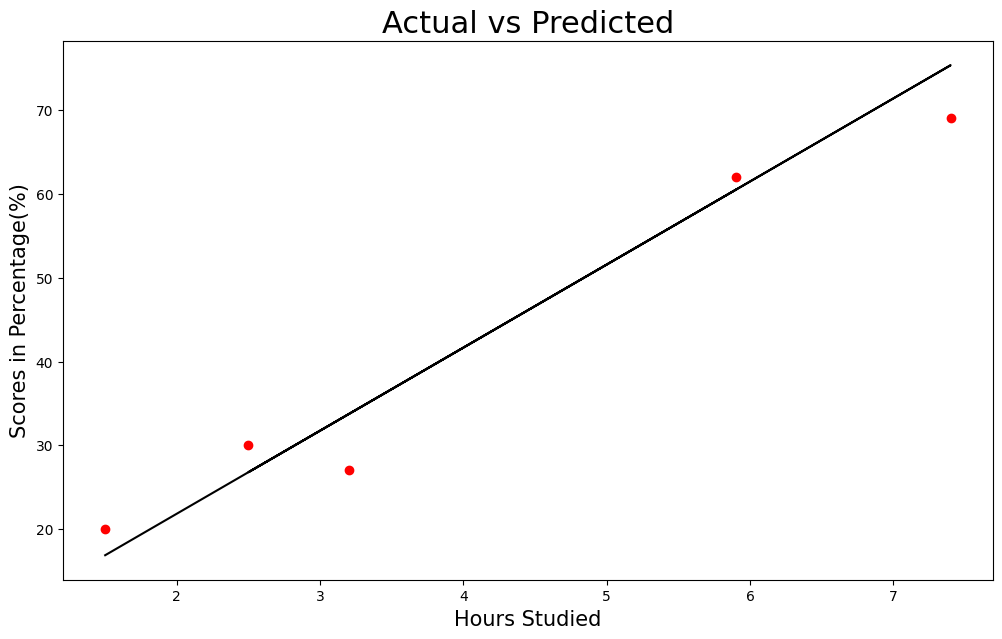

In [25]:
#let us see above result graphically
plt.figure(figsize=(12,7))
plt.scatter(x=X_test, y=y_test, color='Red')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=22)
plt.ylabel('Scores in Percentage(%)', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

In [26]:
#Model Evaluation Metrics

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Mean Squared Error: 21.598769307217406
Mean Absolute Error: 4.183859899002975


## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [27]:
#Testing the predictions corresponds to 9.25 hrs

hours = 9.25
prediction = regressor.predict([[hours]])
print(f"No. of hours studied = {hours}")
print(f"Scores obtained = {prediction}")

No. of hours studied = 9.25
Scores obtained = [93.69173249]


In [28]:
print(f"The score of student who studied for 9.25 hours a day = {regressor.predict([[9.25]])}")

The score of student who studied for 9.25 hours a day = [93.69173249]


# Conclusion

## ===> *According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 Score.*